In [30]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect
import matplotlib.pyplot as plt


In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# Get the name of the table. 
inspector= inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [5]:
# Using the inspector to print the column names within the table and its types
columns=inspector.get_columns('measurement')
for column in columns:
    print(column)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [6]:
# Using the inspector to print the column names within the table and its types
columns=inspector.get_columns('station')
for column in columns:
    print(column)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [9]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps=session.query(Measurement.date,Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "06")

In [13]:
#  3. Convert the June temperatures to a list.
june_temps=session.query(Measurement.date,Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "06").all()
june_temps

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [60]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df=pd.DataFrame(june_temps, columns=['Date', 'June Temps'])
june_temps_df.set_index(june_temps_df['Date'],inplace=True)
print(june_temps_df.to_string(index=False))


      Date  June Temps
2010-06-01        78.0
2010-06-02        76.0
2010-06-03        78.0
2010-06-04        76.0
2010-06-05        77.0
2010-06-06        78.0
2010-06-07        77.0
2010-06-08        78.0
2010-06-09        78.0
2010-06-10        79.0
2010-06-11        78.0
2010-06-12        78.0
2010-06-13        78.0
2010-06-14        77.0
2010-06-15        78.0
2010-06-16        78.0
2010-06-17        77.0
2010-06-18        77.0
2010-06-19        82.0
2010-06-20        78.0
2010-06-21        78.0
2010-06-22        78.0
2010-06-23        78.0
2010-06-24        78.0
2010-06-25        77.0
2010-06-26        76.0
2010-06-27        78.0
2010-06-28        78.0
2010-06-29        78.0
2010-06-30        78.0
2011-06-01        77.0
2011-06-02        78.0
2011-06-03        73.0
2011-06-04        70.0
2011-06-05        76.0
2011-06-06        77.0
2011-06-07        77.0
2011-06-08        77.0
2011-06-09        77.0
2011-06-10        78.0
2011-06-11        77.0
2011-06-12        77.0
2011-06-13 

In [61]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
June_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [18]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps=session.query(Measurement.date,Measurement.tobs).filter(func.strftime("%m",Measurement.date)=="12")

In [19]:
# 7. Convert the December temperatures to a list.
# june_temps=session.query(Measurement.date,Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "06").all()
dec_temps=session.query(Measurement.date,Measurement.tobs).filter(func.strftime("%m",Measurement.date)=='12').all()
dec_temps

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [66]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df=pd.DataFrame(dec_temps,columns=['Date','Dec Temps'])
dec_temps_df.set_index(dec_temps_df['Date'],inplace=True)
dec_temps_df

,Date,Dec Temps
Date,,
2010-12-01,2010-12-01,76.0
2010-12-03,2010-12-03,74.0
2010-12-04,2010-12-04,74.0
2010-12-06,2010-12-06,64.0
2010-12-07,2010-12-07,64.0
...,...,...
2016-12-27,2016-12-27,71.0
2016-12-28,2016-12-28,71.0
2016-12-29,2016-12-29,69.0


In [21]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# ##Two Queries

Text(0.5, 1.0, 'December Temperatures')

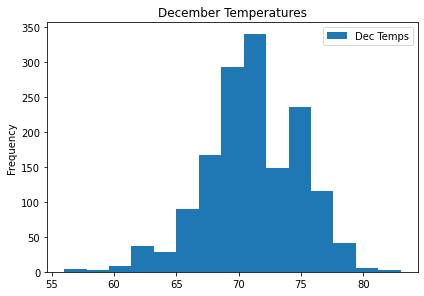

In [59]:
dec_temps_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('December Temperatures')


Text(0.5, 1.0, 'June Temperatures')

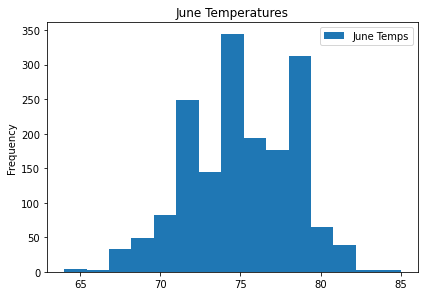

In [62]:
june_temps_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('June Temperatures')

In [87]:
# precipitation Dec and June
dec_temp_prcp=session.query(Measurement.date,Measurement.prcp).filter(func.strftime("%m",Measurement.date)=="12").all()
june_temps_prpc=session.query(Measurement.date,Measurement.prcp).filter(func.strftime("%m", Measurement.date) == "06").all()


In [88]:
# summary statistics June
june_temps_prpc_df=pd.DataFrame(june_temps_prpc)
june_temps_prpc_df.describe()

,prcp
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [89]:
# summary statistics Dec
dec_temp_prcp_df=pd.DataFrame(dec_temp_prcp)
dec_temp_prcp_df.describe()

,prcp
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
